<a href="https://colab.research.google.com/github/Diya1s/deep-learning/blob/main/pr3_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Load your diabetes.csv

data = pd.read_csv("diabetes.csv")

# Set feature and target (update target_column if different in your file)
feature_column = "BMI"       # predictor
target_column = "Outcome"    # target variable

X = data[[feature_column]].values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Add bias (x0=1)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [3]:


# Step 2: Cost function

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y.reshape(-1,1))**2)
    return cost


In [11]:

# Step 3: Batch Gradient Descent

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    y = y.reshape(-1, 1)
    cost_history = []

    for i in range(n_iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Run gradient descent
theta_gd, cost_history = gradient_descent(X_train_bias, y_train, learning_rate=0.0001, n_iterations=2000)

In [12]:

# Step 4: Normal Equation

theta_normal = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)


In [13]:

# Step 5: Evaluate both models

y_pred_gd = X_test_bias.dot(theta_gd)
y_pred_normal = X_test_bias.dot(theta_normal)

mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_normal = mean_squared_error(y_test, y_pred_normal)

print("Gradient Descent Parameters (θ0, θ1):", theta_gd.ravel())
print("Normal Equation Parameters (θ0, θ1):", theta_normal.ravel())
print("Test MSE (Gradient Descent):", mse_gd)
print("Test MSE (Normal Equation):", mse_normal)

Gradient Descent Parameters (θ0, θ1): [-0.00284634  0.01153312]
Normal Equation Parameters (θ0, θ1): [-0.29804031  0.02026962]
Test MSE (Gradient Descent): 0.2150711662178536
Test MSE (Normal Equation): 0.21846716328959612


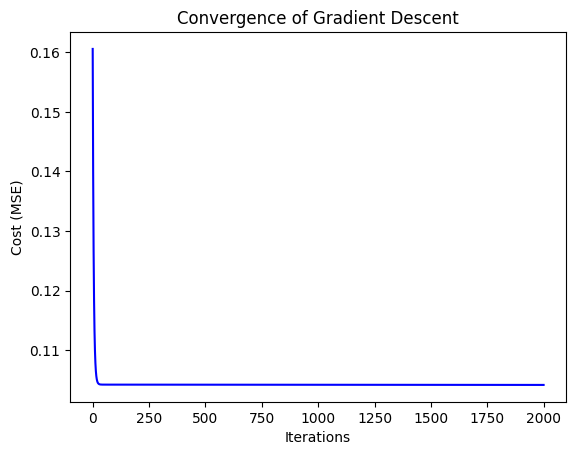

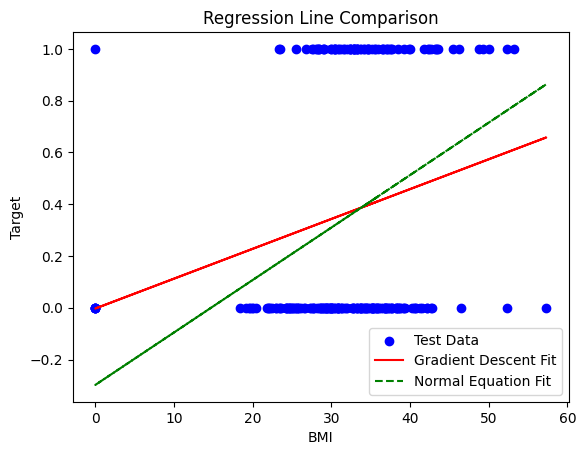

In [14]:

# Step 6: Plot convergence

plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent")
plt.show()

# Step 7: Plot regression lines

plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.plot(X_test, y_pred_gd, "r-", label="Gradient Descent Fit")
plt.plot(X_test, y_pred_normal, "g--", label="Normal Equation Fit")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.legend()
plt.title("Regression Line Comparison")
plt.show()